# Goals
- Increase enrolment of students
- Improve retention, progression and graduation rates
- Recruite better academically qualified undergraduate and graduate students
- Increase external funding and recognition
# Business Questions
- Identify key drivers of early student attrition
- Build a predictive model to identify students with high early attrition risk
- Recommend appropriate interventions based on the analysis
> Early attrition is defined as students drop out within one year of successfully joining the program (completed admission process)
# Deliverables
Besided the well documented code, powerpoint report should outline and summarize the following :
- Exploratory data analysis showing key associations
- Segment analysis showing key drivers of attrition
- Results of statistical modelling along with business interpretations and recommended interventions

# Steps
- Identify target and independant variables
- Perform EDA 
- Glean insights from EDA
- Recommend actions 
- Build stat/ml models
    - Logistic regression
    - Random Forest 
    - XGBoost 
- Write a report 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Student Applications & Performance.xlsx",sheet_name="University information")
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [3]:
df.shape

(3400, 56)

In [4]:
df_cp = df.copy()

In [5]:
# import sweetviz as sv
# clear_report = sv.analyze(df)
# clear_report.show_html('clear_report.html')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [7]:
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [8]:
df.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [9]:
df['RETURNED_2ND_YR'].value_counts()

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

In [10]:
# Creating target feature
df['Attrition'] = df['RETURNED_2ND_YR']
df.drop('RETURNED_2ND_YR',axis=1,inplace=True)

In [11]:
# Swapping 1&0 in attrition so 1 represents students who discontinued 
df['Attrition'] = df['Attrition'].map(lambda x: 0 if x==1 else 1)
df['Attrition'].value_counts()

0    2677
1     723
Name: Attrition, dtype: int64

# EDA
## Target - Attrition

In [12]:
# Imbalanced target
df['Attrition'].value_counts(normalize=True)

0    0.787353
1    0.212647
Name: Attrition, dtype: float64

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pie plot')

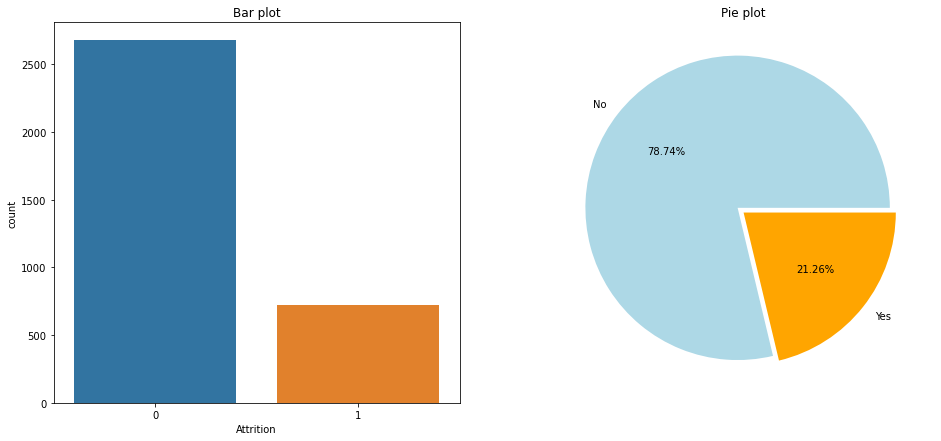

In [13]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
sns.countplot(df['Attrition'])
plt.title('Bar plot')

plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts(normalize=True),explode=[0.05,0],colors=['lightblue','orange'],autopct='%.2f%%',labels=['No','Yes'])
plt.title('Pie plot')

## Student identifier

In [14]:
df['STUDENT IDENTIFIER'].nunique()
# insignificant variable

3400

## Student age

In [15]:
df['STDNT_AGE'].describe()
# IQR method will not be possible as Q1,Q2,Q3 are all the same

count    3400.000000
mean       17.994118
std         0.552052
min        16.000000
25%        18.000000
50%        18.000000
75%        18.000000
max        26.000000
Name: STDNT_AGE, dtype: float64

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STDNT_AGE', ylabel='Density'>

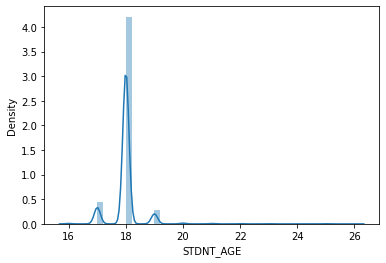

In [16]:
sns.distplot(df['STDNT_AGE'])

Text(0.5, 1.0, 'Count of age group w.r.t attrition')

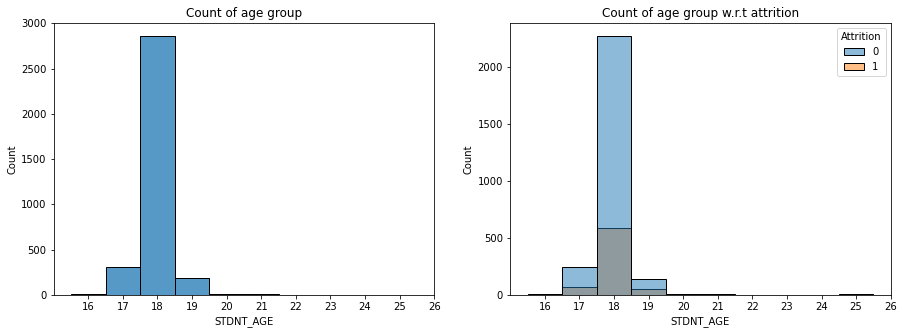

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='STDNT_AGE',binwidth=1)
plt.xticks(ticks=np.arange(16.5,27.5,1),labels=np.arange(16,27))
plt.title('Count of age group')

plt.subplot(1,2,2)
sns.histplot(data=df,x='STDNT_AGE',hue='Attrition',binwidth=1)
plt.xticks(ticks=np.arange(16.5,27.5,1),labels=np.arange(16,27))
plt.title('Count of age group w.r.t attrition')

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STDNT_AGE'>

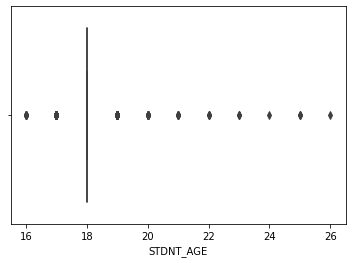

In [18]:
# outliers in age group 
sns.boxplot(df['STDNT_AGE'])

In [19]:
df['STDNT_AGE'].value_counts()

18    2860
17     309
19     190
20      14
16       8
21       7
22       4
23       3
25       3
24       1
26       1
Name: STDNT_AGE, dtype: int64

## Student gender

In [20]:
df['STDNT_GENDER'].value_counts()

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

In [21]:
df['STDNT_GENDER'].value_counts(normalize=True)*100

F    62.941176
M    37.058824
Name: STDNT_GENDER, dtype: float64

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STDNT_GENDER', ylabel='count'>

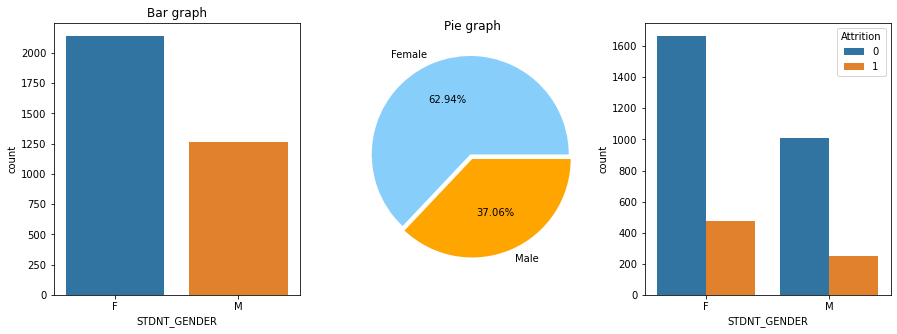

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df['STDNT_GENDER'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(df['STDNT_GENDER'].value_counts(),colors=['lightskyblue','orange'],labels=['Female','Male'],autopct='%.2f%%',explode=[0.05,0])
plt.title('Pie graph')

plt.subplot(1,3,3)
sns.countplot(data=df,x='STDNT_GENDER',hue='Attrition')

# Females tend to attrite more than males

## Student Background

In [23]:
df['STDNT_BACKGROUND'].value_counts()

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STDNT_BACKGROUND', ylabel='count'>

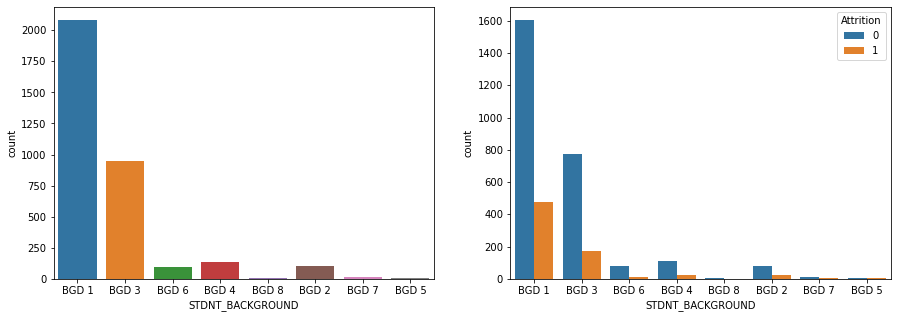

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['STDNT_BACKGROUND'])

plt.subplot(1,2,2)
sns.countplot(df['STDNT_BACKGROUND'],hue=df['Attrition'])
# lot of students are from BGD1 , attrition is also more in BGD 1

In [25]:
pd.crosstab(index=df['STDNT_BACKGROUND'],columns=df['Attrition'])

Attrition,0,1
STDNT_BACKGROUND,,
BGD 1,1605,477
BGD 2,82,24
BGD 3,777,170
BGD 4,113,26
BGD 5,4,4
BGD 6,80,14
BGD 7,12,7
BGD 8,4,1


In [26]:
pd.crosstab(index=df['STDNT_BACKGROUND'],columns=df['Attrition'],normalize=True)

Attrition,0,1
STDNT_BACKGROUND,,
BGD 1,0.472059,0.140294
BGD 2,0.024118,0.007059
BGD 3,0.228529,0.050000
BGD 4,0.033235,0.007647
BGD 5,0.001176,0.001176
BGD 6,0.023529,0.004118
BGD 7,0.003529,0.002059
BGD 8,0.001176,0.000294


In [27]:
df_yes = df[df['Attrition'] == 1]
df_no = df[df['Attrition'] == 0]

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


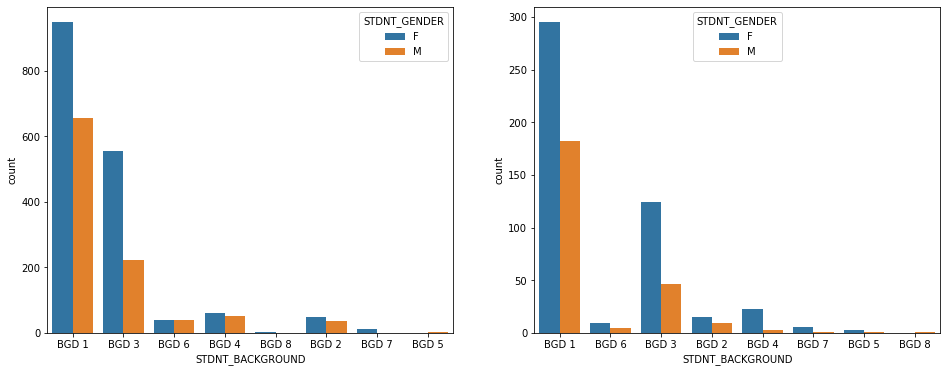

In [28]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(df_no['STDNT_BACKGROUND'], hue=df_no['STDNT_GENDER'])

plt.subplot(1,2,2)
sns.countplot(df_yes['STDNT_BACKGROUND'], hue=df_yes['STDNT_GENDER'])
plt.show()

#Gender vs Bckground vs target

## IN_STATE_FLAG

In [29]:
df['IN_STATE_FLAG'].value_counts()

Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64

In [30]:
df['IN_STATE_FLAG'].value_counts(normalize=True)*100

Y    90.088235
N     9.911765
Name: IN_STATE_FLAG, dtype: float64

Text(0.5, 1.0, 'Count of student from state w.r.t attrition')

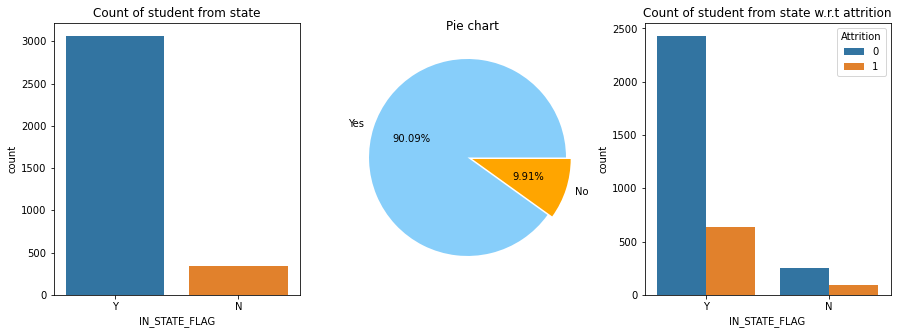

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(data=df,x='IN_STATE_FLAG')
plt.title('Count of student from state')

plt.subplot(1,3,2)
plt.pie(df['IN_STATE_FLAG'].value_counts(),
        explode=[0.05,0],
        labels=['Yes','No'],
        colors=['lightskyblue','orange'],
        autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(data=df,x='IN_STATE_FLAG',hue='Attrition',)
plt.title('Count of student from state w.r.t attrition')
# Many students are from in-state and same for attrition

In [32]:
pd.crosstab(df['IN_STATE_FLAG'],df['Attrition'],normalize=True)

Attrition,0,1
IN_STATE_FLAG,,
N,0.072941,0.026176
Y,0.714412,0.186471


## International status

In [33]:
df['INTERNATIONAL_STS'].value_counts()

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [34]:
df['INTERNATIONAL_STS'].value_counts(normalize=True)*100
# We can ignore this feature however we can analyse with target once

N    99.205882
Y     0.794118
Name: INTERNATIONAL_STS, dtype: float64

Text(0.5, 1.0, 'count of int students w.r.t attrition')

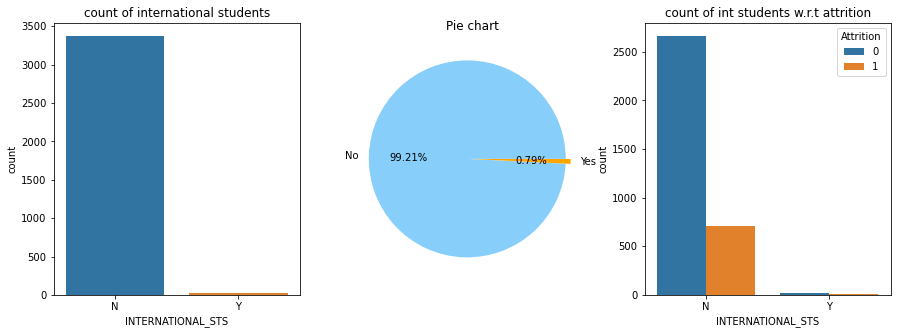

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(data=df,x='INTERNATIONAL_STS')
plt.title('count of international students')

plt.subplot(1,3,2)
plt.pie(df['INTERNATIONAL_STS'].value_counts(),
       explode=[0.05,0],
       labels=['No','Yes'],
       colors=['lightskyblue','orange'],
       autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(data=df,x='INTERNATIONAL_STS',hue='Attrition')
plt.title('count of int students w.r.t attrition')
# many are from the state and many have left the course

In [36]:
pd.crosstab(df['INTERNATIONAL_STS'],df['Attrition'])

Attrition,0,1
INTERNATIONAL_STS,,
N,2662,711
Y,15,12


## Student major

In [37]:
df['STDNT_MAJOR'].value_counts()
# many of the students have not declared their majors

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Chemistry                          64
Political Science                  64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [38]:
pd.crosstab(df['STDNT_MAJOR'],df['Attrition'])

Attrition,0,1
STDNT_MAJOR,,
Accounting,42,12
Applied Computer Science,27,5
Art,57,18
Art Education,7,2
Biology,280,82
Biology and Secondary Ed,2,3
Chemistry,54,10
Chemistry and Secondary Ed,2,0
Communication,56,14


<AxesSubplot:xlabel='count', ylabel='STDNT_MAJOR'>

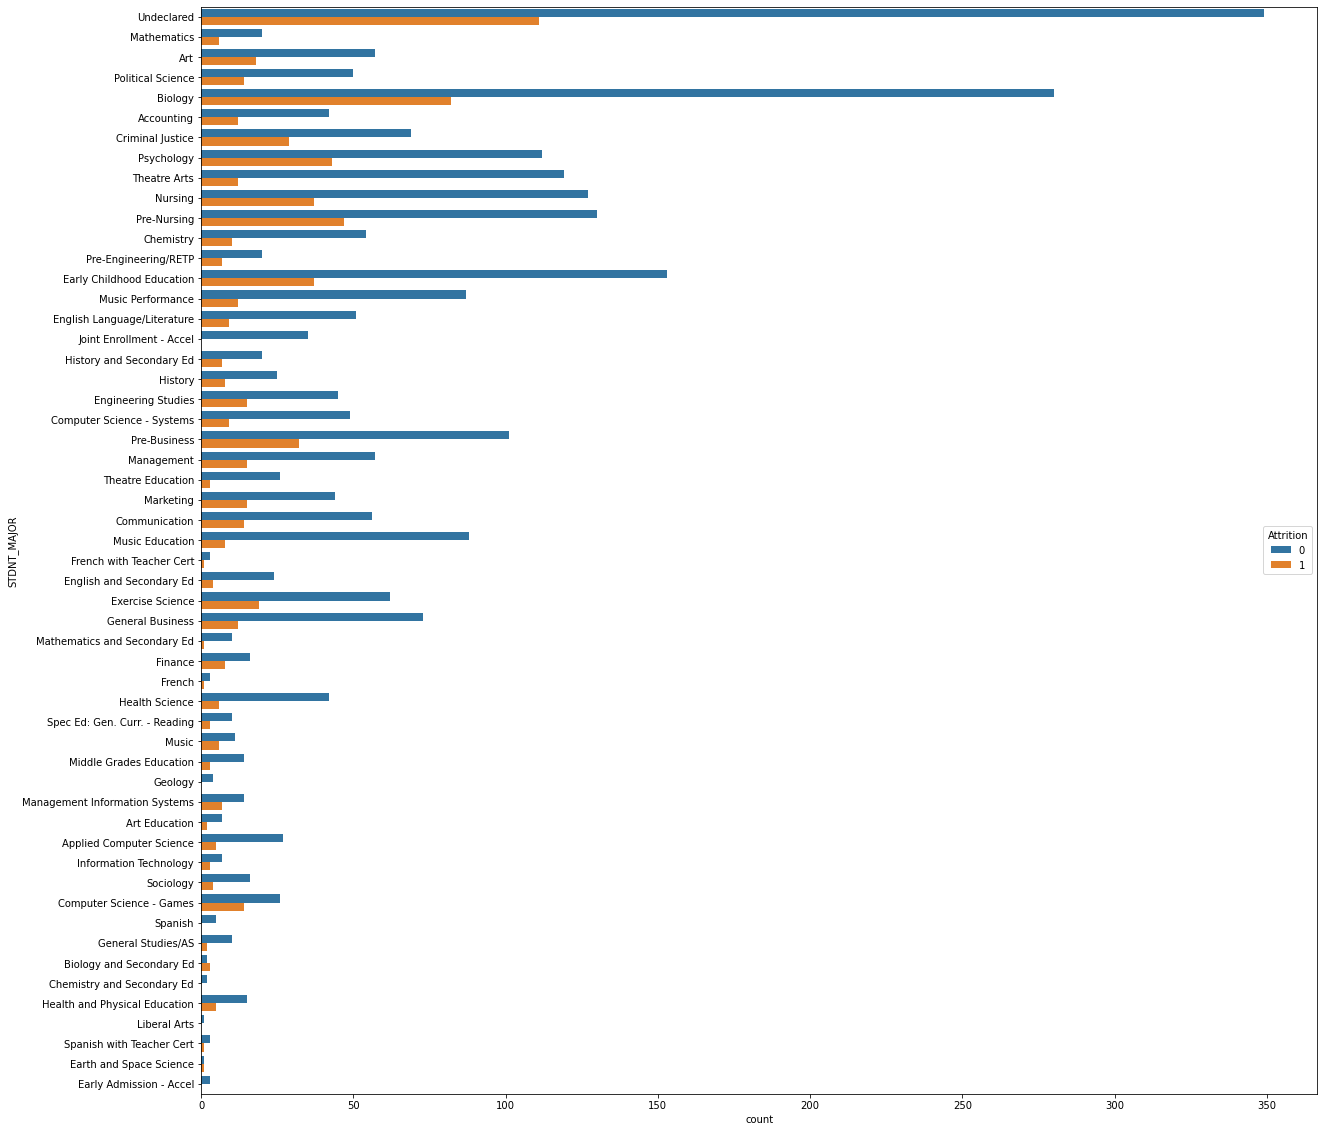

In [39]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,y='STDNT_MAJOR',hue='Attrition')

## Student minor

In [40]:
df['STDNT_MINOR'].value_counts(normalize=True)*100
# 93% of the students have no minors

N                                92.941176
Spanish                           0.764706
Music                             0.558824
Psychology                        0.558824
Foundations of Business           0.441176
Communication                     0.411765
History                           0.382353
Criminal Justice                  0.352941
Theatre Arts                      0.352941
Computer Science - Systems        0.294118
Early Childhood Education         0.264706
Mathematics                       0.205882
Art History                       0.176471
Professional Writing              0.176471
Marketing                         0.176471
Sociology                         0.147059
Art                               0.147059
English Language/Literature       0.147059
Accounting                        0.117647
Political Science                 0.117647
Biology                           0.117647
Chemistry                         0.117647
French                            0.117647
Computer In

In [41]:
pd.crosstab(df['STDNT_MINOR'],df['Attrition'],normalize=True)*100
# We can ignore this feature

Attrition,0,1
STDNT_MINOR,,
Accounting,0.088235,0.029412
African Studies,0.058824,0.000000
Anthropology,0.058824,0.000000
Art,0.088235,0.058824
Art History,0.117647,0.058824
Asian Studies,0.058824,0.000000
Biology,0.088235,0.029412
Chemistry,0.117647,0.000000
Communication,0.382353,0.029412


## Entrance test

In [42]:
df[['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB']].isnull().sum()
# we should only consider combined test

STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
dtype: int64

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB', ylabel='Density'>

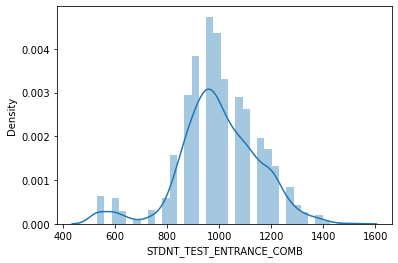

In [43]:
sns.distplot(df['STDNT_TEST_ENTRANCE_COMB'])

Text(0.5, 1.0, 'Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')

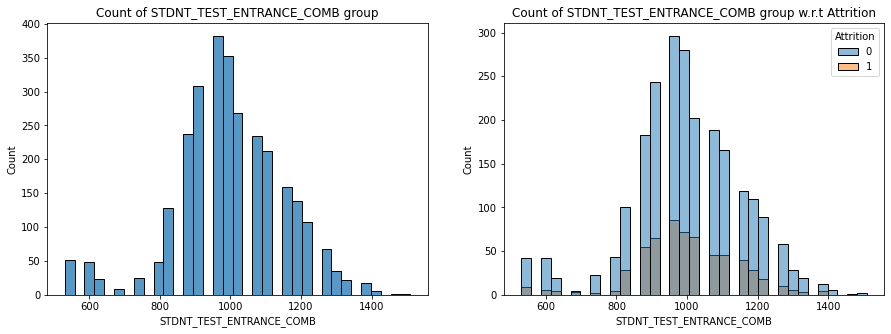

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df['STDNT_TEST_ENTRANCE_COMB'])
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group')

plt.subplot(1,2,2)
sns.histplot(data=df,x='STDNT_TEST_ENTRANCE_COMB',hue='Attrition')
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')

C:\Users\Jobin\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB'>

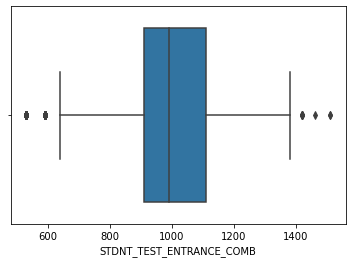

In [45]:
# We can use IQR technique to remove outliers
sns.boxplot(df['STDNT_TEST_ENTRANCE_COMB'])